# Data repository for Network Analysis of Energy Futures
## Article Title: Visualizing different perspectives in energy scenarios
## Authors: Jude H. Kurniawan (University of Waterloo), Vanessa Schweizer (University of Waterloo)

Repository: https://github.com/judekurn/energy-futures/blob/master/Energyfutures.ipynb

### Abstract:
Studies of energy futures have been garnering attention because they could provide the bird’s eye view of the landscape and the roadmaps toward low-carbon energy transitions (Geels et al., 2016; Rogelj et al. 2016). However, different organizations often conduct and commission energy futures studies independently and may unknowingly influence scenario outcomes to be aligned with the organizations’ perspectives—hence, stories told by different scenarios can be quite different. Insofar, research has rarely examined ways to ‘harmonize’ different scenarios, let alone ‘stitching’ them all together for producing a wider perspective of energy futures (Zurek and Henrich, 2006; Schweizer and Kurniawan, 2016). Here we apply social network analysis to visualize different perspectives of four Canadian energy futures studies and one word energy scenarios developed by different organizations. We find that certain studies have narrow perspective and appear to align with either the pro-economics or pro-environmentalism perspectives. To harmonize these different perspectives, we analyze by visualizing all scenario elements and their interrelationship derived from individual studies. We observe relational patterns underneath the complex surface for how different energy futures studies interrelate. We found that low-carbon energy transition at the global scale is highly dependent on the establishment of low-carbon governance and institutions. Interestingly, at the country-level such as Canada, low-carbon governance is not the fundamental driver; instead, Canada should be more concerned with issues related to mass consumption and freight/logistic transport. Our study suggests that understanding the country-specific fundamental driver of low-carbon energy transition will avoid ‘barking at the wrong trees.’

In [1]:
import csv
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from seaborn import color_palette, set_style, palplot

In [2]:
import pkg_resources
print('Networkx Version: ',pkg_resources.get_distribution('networkx').version)
print('Pandas Version: ',pkg_resources.get_distribution('pandas').version)
print('Matplotlib Version: ',pkg_resources.get_distribution('matplotlib').version)

Networkx Version:  2.1
Pandas Version:  0.20.3
Matplotlib Version:  2.1.0


### Description of Edgelist.csv file
We subjected the five energy futures studies to qualitatative analysis (a.k.a. qualitative coding technique) to search and extract text stings or statements implying scenario elements influencing others in the future. These statements suggest interrelationships between two scenario elements. We put emphasis on the future, which means the statements decribing influences in the past would be ignored; statements indicating influences in the future would be incorporated into the dataset (Edgelist.csv). The dataset comprises a list of two scenario elements deemed to have an established relationship. In this study, the edges are non-directed influences because statements describing the interrelationship might not be explicit in indicating causations, instead they implied correlations.

In [3]:
se = pd.read_csv('./data/ES_edgelist.csv', sep=',')
se.head()

,node1,node2,report_name
0,Oil consumption,GHG Emissions (aggregate),Trottier
1,LNG consumption,GHG Emissions (aggregate),Trottier
2,Electricity consumption,GHG Emissions (aggregate),Trottier
3,Biofuels consumption,Oil consumption,Trottier
4,Oil consumption,GHG Emissions (aggregate),Trottier


I load the compiled edgelist in .csv file into a pandas dataframe. The data has three columns, node1, node2, and report_name

In [4]:
#Seperating edgelist into different dataframes so that nodes/edges attributes can be manipulated individually
se4 = se.iloc[:192]
se_trot = se.iloc[:30]
se_deep = se.iloc[30:72]
se_neb = se.iloc[72:92]
se_rnrg = se.iloc[92:192]
se_wec = se.iloc[192:]

Subsequently, I create dataframe se4 for 4 energy futures studies related to Canada...excluding the global study conducted by WEC, and individual edgelist for each scenarios report. The reason for this is because I would like to produce invididual graphs for each report.

## Section 1: Network analysis to reveal relational pattern of energy futures studies for Canada
The graphs GSE (Graphs Scenarios Energy) are created using Networkx that imports edgelist from the pandas dataframes. Note that GSE5 is the graph that consists of 5 scenario reports (4 Canada and 1 World scenarios) and the GSE4 is a grpah for 4 Canada scenario reports. The GSE5 will become the overall 'layout' in this study while the *smaller* graphs (e.g. GSE4 and GSE_example) will be layered over the overall layout.

In [5]:
GSE5 = nx.from_pandas_edgelist(se,'node1','node2',edge_attr=True)
GSE4 = nx.from_pandas_edgelist(se4,'node1','node2',edge_attr=True)
GSE_trot = nx.from_pandas_edgelist(se_trot,'node1','node2',edge_attr=True)
GSE_deep = nx.from_pandas_edgelist(se_deep,'node1','node2',edge_attr=True)
GSE_neb = nx.from_pandas_edgelist(se_neb,'node1','node2',edge_attr=True)
GSE_rnrg = nx.from_pandas_edgelist(se_rnrg,'node1','node2',edge_attr=True)
GSE_wec = nx.from_pandas_edgelist(se_wec,'node1','node2',edge_attr=True)

In [6]:
nx.info(GSE5)

'Name: \nType: Graph\nNumber of nodes: 179\nNumber of edges: 246\nAverage degree:   2.7486'

The figure shown below comprises of 4 sub-plots arranged in 2x2. I use the kamadi_kawai layout to obtain a fixed seed (the nodes location will not change when the figure is regenerated). The layout is based on GSE5 (5 scenarios) but I only plot the GSE4 (4 scenarios) because I want to show the perspective of one scenario against the Canada scenarios (that means 4 scenarios). The nodes/edges from individual report are plotted in blue against the backdrop of all nodes/edges for four Canada energy scenarios plotted in grey.

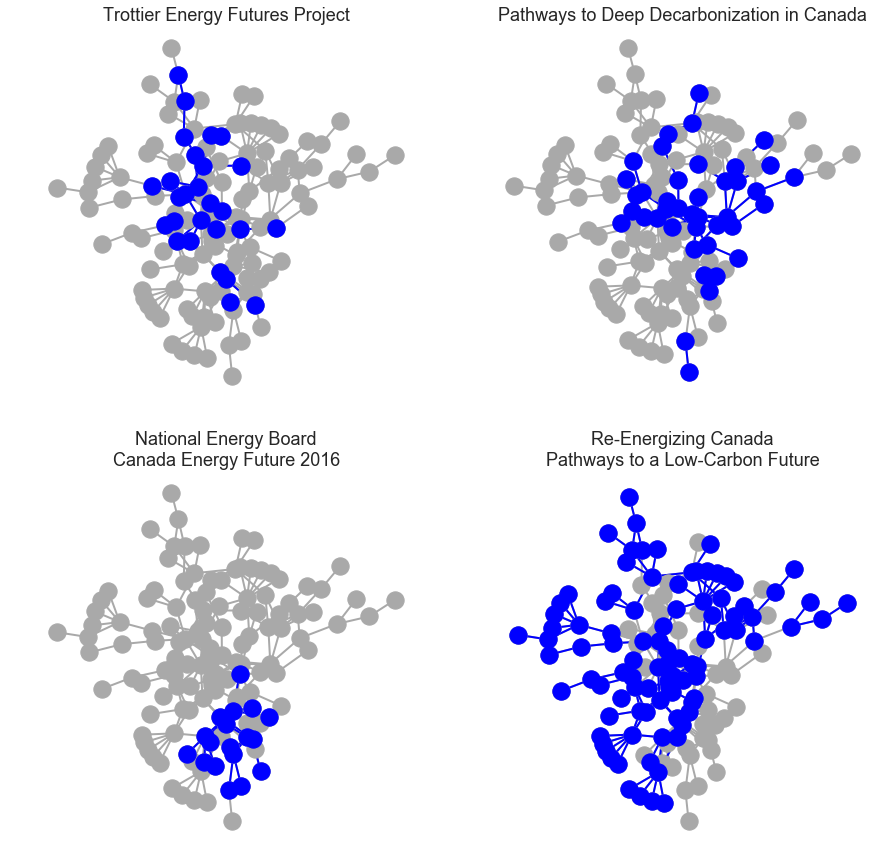

In [102]:
#customization lines for different studies
studytext1 = 'Trottier Energy Futures Project'
studytext2 = 'Re-Energizing Canada\nPathways to a Low-Carbon Future'
studytext3 = 'National Energy Board\nCanada Energy Future 2016'
studytext4 = 'Pathways to Deep Decarbonization in Canada'
# Customization ends

plt.figure(0)

layout = nx.kamada_kawai_layout(GSE5) # GSE5 is the base layout for all the graph plots
set_style('white')
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.axis('off')
plt.title(studytext1,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=300, alpha=1)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=2)
nx.draw_networkx_nodes(GSE_trot, layout, node_color='b', node_size=300)
nx.draw_networkx_edges(GSE_trot, layout, edge_color='b',width=2)

plt.subplot(224)
plt.axis('off')
plt.title(studytext2,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=300, alpha=1)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=2)
nx.draw_networkx_nodes(GSE_rnrg, layout, node_color='b', node_size=300)
nx.draw_networkx_edges(GSE_rnrg, layout, edge_color='b',width=2)

plt.subplot(223)
plt.axis('off')
plt.title(studytext3,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=300, alpha=1)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=2)
nx.draw_networkx_nodes(GSE_neb, layout, node_color='b', node_size=300)
nx.draw_networkx_edges(GSE_neb, layout, edge_color='b',width=2)

plt.subplot(222)
plt.axis('off')
plt.title(studytext4,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=300, alpha=1)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=2)
nx.draw_networkx_nodes(GSE_deep, layout, node_color='b', node_size=300)
nx.draw_networkx_edges(GSE_deep, layout, edge_color='b',width=2)

plt.show()

The Trottier report covers a portion of the central theme (we will know this theme when we perform community detections in the next section). NEB report has a narrow perspective as can be seen from the relational pattern shown. The Deep Decarbonization report has a wider perspective than trottier, which is not surprising because Trottier scenarios are based on quantiative energy modelling which may limit the use of scenario elements, especially qualitative scenario elements that cannot be coupled to the models. Interestingly, the Deep Decabonization report seems to be 'mutually exclusive' with the NEB report. Of the four scenarios, the Re-Energizing Canada report are shown to have the broadest perspective.

In [103]:
print('The scenario elements or nodes in NEB report are: \n', GSE_neb.nodes())
print('The scenario elements or nodes in Deep Decarbonizations report are: \n', list(GSE_deep.nodes()))

The scenario elements or nodes in NEB report are: 
 ['Oil demand (global)', 'Oil prices (global)', 'LNG production (USA)', 'Oil sand production', 'LNG demand (USA/Canada)', 'LNG prices (global)', 'Population', 'GDP', 'USA Economy', 'Rise of China and Asia', 'Export', 'LNG infrastructures development', 'LNG production', 'Energy intensity', 'Developing countries GDP', 'Oil infrastructures development', 'LNG demand (USA)', 'LNG demand']
The scenario elements or nodes in Deep Decarbonizations report are: 
 ['Fuel switching', 'GHG Emissions (aggregate)', 'Renewable energy generation', 'Wind power production cost', 'Wind power generation', 'Solar power production cost', 'Solar power generation', 'Innovation capacity (global)', 'Banning coal/oil-fired generation', 'Carbon intensity', 'Gas-fired generation', 'LNG demand', 'New clean tech generation', 'Electricity generation', 'Electrification policy', 'Tech dev in renewable energy', 'GHG Emissions (building)', 'Adoption of EV', 'GHG Emissions 

From the list of nodes found in NEB and Deep Decarbonization reports, we observe that NEB report emphasizes issues related to economic development (energy demand and supply) of the resource extraction sector. There seems to be no nodes addressing environmental issue metnioned by the report. The Deep Decarbonization report, on the other hand, comprises of nodes related to the production of clean energy and addresses mostly environmental issues. Although the environmental issues are addressed extensively, the report appears to have missed the economic issues -- resource economic. Incorporating scenario elements related to resource economy is particular important for Canada since we cannot simply 'flick' the switch from carbon economy to decarbonized economy. We need to analyse how we can make the transition.

## Section 2: Network analysis to reveal relational pattern across scale (Canada/Global)
It will be interesting to observe how nergy futures in Canada correspond to global energy futures. Here, I use global energy scenario by World Energy Council (WEC) to find out how enery futures studies in Canada would stack up against the world energy scenarios.

### Extracting cross-scale nodes
There are nodes present in WEC studies that may be also present in one of the four Canadian energy studies. To capture these cross-scale nodes, I created a list of nodes derived from the set intersection between the nodes found in GSE4 and GSE_wec. From the list of nodes, I created a graph, GSE_xscale, which will be used lated to plot the graph.

In [104]:
ls1 = list(GSE4.nodes())
ls2 = list(GSE_wec.nodes())
ls3 = set(ls1).intersection(ls2)
GSE_xscale = nx.Graph()
for n in ls3:
    GSE_xscale.add_node(n)

I created another figure, this time it is comprised of three sub-plots arranged in 1x3. 

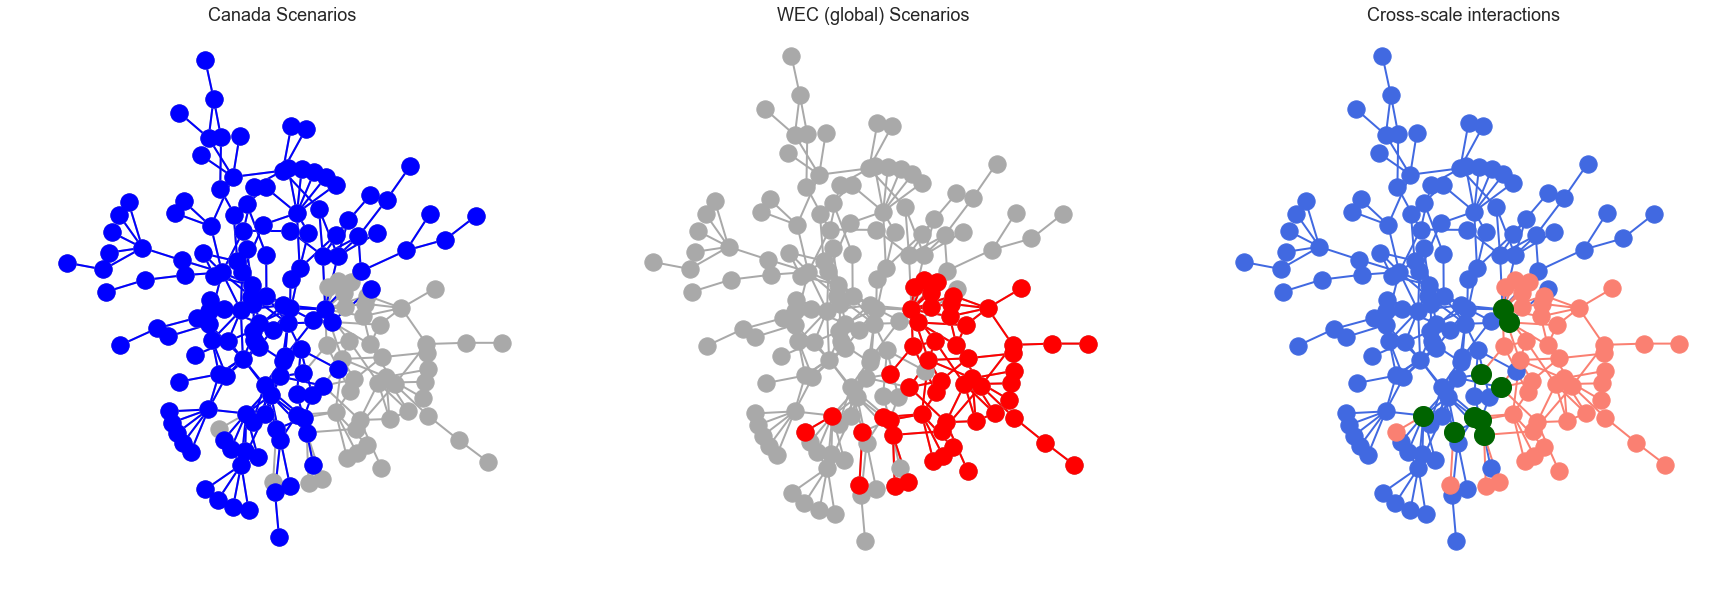

In [105]:
plt.figure(1)

layout = nx.kamada_kawai_layout(GSE5)
set_style('white')
plt.figure(figsize=(30,10))
plt.axis('off')

plt.subplot(131)
plt.axis('off')
plt.title('Canada Scenarios',fontsize=18)
nx.draw_networkx_nodes(GSE5, layout, node_color='darkgrey', node_size=300, alpha = 1)
nx.draw_networkx_edges(GSE5, layout, edge_color='darkgrey',width=2)
nx.draw_networkx_nodes(GSE4, layout, node_color='b', node_size=300)
nx.draw_networkx_edges(GSE4, layout, edge_color='b',width=2)

plt.subplot(132)
plt.axis('off')
plt.title('WEC (global) Scenarios',fontsize=18)
nx.draw_networkx_nodes(GSE5, layout, node_color='darkgrey', node_size=300, alpha=1)
nx.draw_networkx_edges(GSE5, layout, edge_color='darkgrey',width=2)
nx.draw_networkx_nodes(GSE_wec, layout, node_color='r', node_size=300)
nx.draw_networkx_edges(GSE_wec, layout, edge_color='r',width=2)

plt.subplot(133)
plt.axis('off')
plt.title('Cross-scale interactions',fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='royalblue', node_size=300, alpha = 1)
nx.draw_networkx_edges(GSE4, layout, edge_color='royalblue',width=2)
nx.draw_networkx_nodes(GSE_wec, layout, node_color='salmon', node_size=300, alpha = 1)
nx.draw_networkx_edges(GSE_wec, layout, edge_color='salmon',width=2)
nx.draw_networkx_nodes(GSE_xscale, layout, node_color='darkgreen', node_size=400)

plt.show()

The graph image shows the extent of scenario perspective between 4 Canada scenarios and WEC scenarios. The green dots are the nodes that are present in Canada scenario reports as well as in the global WEC report. That means the green dots are the cross-scale interactions between local and global scenarios for this case.

In [106]:
GSE_xscale.node()

NodeView(('GDP', 'LNG demand (global)', 'Oil demand (global)', 'GHG reduction target', 'Oil prices (global)', 'LNG prices (global)', 'Developing countries GDP', 'Rise of China and Asia', 'Innovation capacity (global)'))

Closer examination of the cross-scale nodes, it appears that Canada energy futures are closely related to three global factors, which are the the global development (developing countries GDP, rise of China and Asia), global energy demand (LNG and oil demand, LNG and oil prices, GHG reduction target), and global innovation capacity.

Being the exporter of fossil fuel resources, the driving factor for export of resources might be motivated by the growth in the developing countries that generates global demand for oil and gas. However, the global energy market could have a major influence on which and what energy resources would be extracted and eventually expoerted. This may explain the seggegration between oil and gas.

Another aspect is the cross-scale linkage for innovative capactiy. The relationship is not clear if the global innovative capacity would be having effects on the local energy futures or the other way. Although it also prudent to speculate that the increase in innovative capacity at the global level could influence how well Canada could transition to the low-carbon energy futures.

## Section 3: Ranking nodes' degree of influence
In this section, I will use three indices (betweenness centrality, Eigenvector centrality, and pagerank) to visualize the degree of influence a node has on the entire network.

### Pagerank
What is page rank?

The pagerank is calculated based on GSE4. 

In [107]:
pr = nx.pagerank(GSE4)
descriptor = GSE4.node()
prlist = []
prnlist = []
for x in pr:
    prlist.append(pr[x])
    prnlist.append(((pr[x]-0.002894)/(0.026427-0.002894))) 
    #The calculated value is normalized using the formula, i.e. the max value = 1

prdf = pd.DataFrame(
    {'descriptor': descriptor,
     'pagerank': prlist,
     'pagerank_norm' : prnlist
    })

prdf_sorted = prdf.sort_values('pagerank',ascending=False)
prdf_sorted.head(21)
# Listing 21 descriptors (not 20) because the GHG emission (aggregate) descriptor is 
# a catch-all descriptor which may appeare to be very influenctial in the network

,descriptor,pagerank,pagerank_norm
10,GHG Emissions (transport),0.026427,1.000010
83,Energy consumption,0.026201,0.990417
1,GHG Emissions (aggregate),0.022680,0.840772
60,GDP,0.021822,0.804308
105,Transition to decarbonized economy,0.021506,0.790882
111,Low carbon energy governance,0.020756,0.759006
14,Energy intensity,0.019865,0.721175
8,LNG production,0.019640,0.711604
75,Innovation capacity,0.019053,0.686655
0,Oil consumption,0.016779,0.590004


### Eigenvector centrality
The Eigenvector centrality 

In [108]:
ec = nx.eigenvector_centrality(GSE4)
descriptor = GSE4.node()
eclist = []
ecnlist = []
for x in ec:
    eclist.append(ec[x])
    ecnlist.append(((ec[x]-3.300609e-32)/(3.598654e-01-3.300609e-32)))

ecdf = pd.DataFrame(
    {'descriptor': descriptor,
     'eigenv': eclist,
     'eigenv_norm' : ecnlist
    })

ecdf_sorted = ecdf.sort_values('eigenv',ascending=False)
ecdf_sorted[:21]   

,descriptor,eigenv,eigenv_norm
10,GHG Emissions (transport),0.359865,1.000000
0,Oil consumption,0.300581,0.835259
73,Trucking (heavy freight) load,0.272496,0.757217
1,GHG Emissions (aggregate),0.269634,0.749263
15,Adoption of EV,0.240423,0.668092
8,LNG production,0.229914,0.638889
14,Energy intensity,0.202061,0.561491
63,Export,0.194013,0.539128
3,Electricity consumption,0.185863,0.516480
6,Oil sand production,0.185688,0.515992


### Betweenness centrality
Betweenness centrality is the measure of how 

In [109]:
bc = nx.betweenness_centrality(GSE4)
descriptor = GSE4.node()
bclist = []
bcnlist = []
for x in bc:
    bclist.append(bc[x])
    bcnlist.append(((bc[x]-0.000000)/(0.341319-0.000000)))

bcdf = pd.DataFrame(
    {'descriptor': descriptor,
     'between': bclist,
     'between_norm' : bcnlist
    })

bcdf_sorted = bcdf.sort_values('between',ascending=False)
bcdf_sorted.head(21) 

,between,between_norm,descriptor
1,0.341319,1.000000,GHG Emissions (aggregate)
14,0.258748,0.758082,Energy intensity
10,0.226362,0.663197,GHG Emissions (transport)
73,0.178882,0.524090,Trucking (heavy freight) load
8,0.144414,0.423107,LNG production
42,0.128245,0.375734,Tech dev in energy storage
63,0.114372,0.335090,Export
60,0.113414,0.332282,GDP
28,0.109417,0.320571,Renewable energy generation
77,0.102790,0.301155,Active mobility


### Plotting degree of influence
First, I create graphs that contains all nodes of the selected descriptor (21 nodes) each for pr (pagerank), ec (Eigenvector centrality) and bc (betweenness centrality). This graph will be used to super impose on the plot to 'highlight' the selected nodes in the network.

In [110]:
prtemplist = prdf_sorted[:21]['descriptor'].tolist()
G_prselect = nx.Graph()
for n in prtemplist:
    G_prselect.add_node(n)
    
ectemplist = ecdf_sorted[:21]['descriptor'].tolist()
G_ecselect = nx.Graph()
for n in ectemplist:
    G_ecselect.add_node(n)
    
bctemplist = bcdf_sorted[:21]['descriptor'].tolist()
G_bcselect = nx.Graph()
for n in bctemplist:
    G_bcselect.add_node(n)

G_ecselect.node()

NodeView(('GHG Emissions (transport)', 'Oil consumption', 'Trucking (heavy freight) load', 'GHG Emissions (aggregate)', 'Adoption of EV', 'LNG production', 'Energy intensity', 'Export', 'Electricity consumption', 'Oil sand production', 'Tech dev in energy storage', 'GDP', 'Biofuels production', 'Tech dev in green transport', 'Tech dev in low carbon system', 'Labor force', 'Freight (trade) volume', 'USA Economy', 'Feedstock (biofuel) supply', 'Agricultural production', 'Biogas production'))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


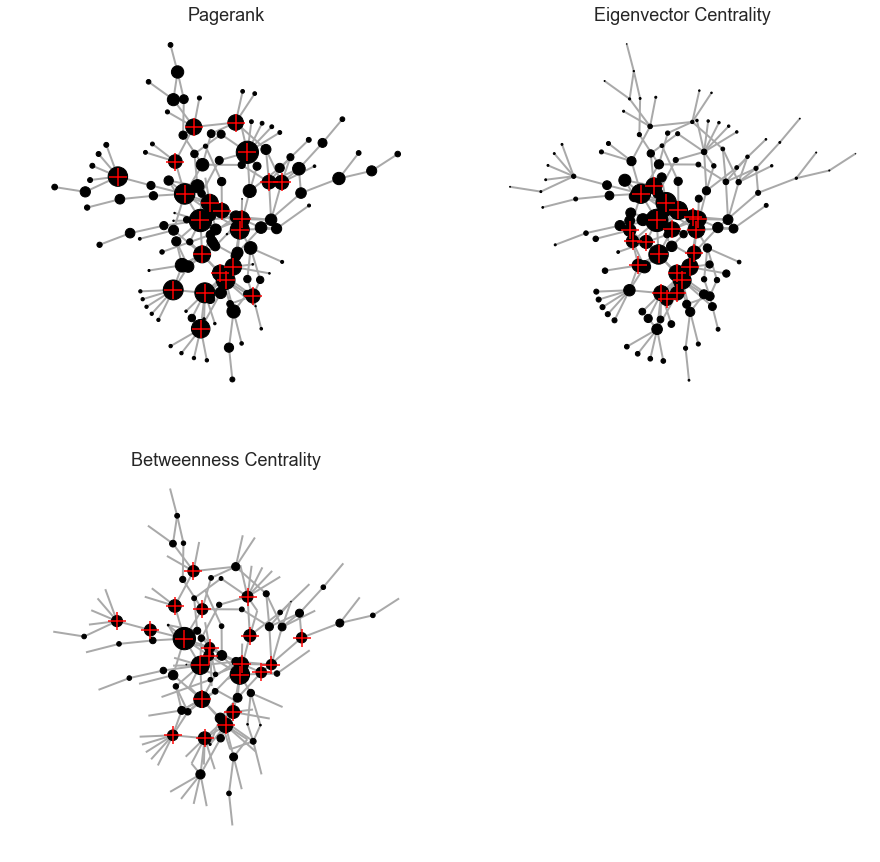

In [111]:
prn_node_size_list = [x*500 for x in prnlist]
ecn_node_size_list = [x*500 for x in ecnlist]
bcn_node_size_list = [x*500 for x in bcnlist]

plt.figure(2)
layout = nx.kamada_kawai_layout(GSE5)
set_style('white')
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.axis('off')
plt.title('Pagerank',fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='black', node_size=prn_node_size_list)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgrey',width=2)
nx.draw_networkx_nodes(G_prselect, layout, node_color='r', node_size=300, node_shape="+", alpha=1)

plt.subplot(222)
plt.axis('off')
plt.title('Eigenvector Centrality',fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='black', node_size=ecn_node_size_list)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgrey',width=2)
nx.draw_networkx_nodes(G_ecselect, layout, node_color='r', node_size=300, node_shape="+", alpha=1)

plt.subplot(223)
plt.axis('off')
plt.title('Betweenness Centrality',fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='black', node_size=bcn_node_size_list)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgrey',width=2)
nx.draw_networkx_nodes(G_bcselect, layout, node_color='r', node_size=300, node_shape="+", alpha=1)

plt.show()

## Section 4: Communities detections

### Defining functions to assign color map to nodes and edges
The color of the edges indicates which report the edges were extracted.
The color of the nodes will be used later to indicate 'communities'

In [112]:
def create_ncolor_map(G, attribute, seaborn_palette="colorblind"):
    """Return a list of hex color mappings for node attributes"""
    attributes = [G.node[label][attribute] for label in G.nodes()]

    # get the set of possible attributes
    attributes_unique = list(set(attributes))
    num_values = len(attributes_unique)

    # generate color palette from seaborn
    node_palette = color_palette(seaborn_palette, num_values).as_hex()

    # create a mapping of attribute to color
    node_color_map = dict(zip(attributes_unique, node_palette))

    # map the attribute for each node to the color it represents
    node_colors = [node_color_map[attribute] for attribute in attributes]

    return node_colors, node_color_map, node_palette

In [113]:
def create_ecolor_map(G, attribute, seaborn_palette="colorblind"):
    """Return a list of hex color mappings for node attributes"""
    attributes = [G.edges[label][attribute] for label in G.edges()]

    # get the set of possible attributes
    attributes_unique = list(set(attributes))
    num_values = len(attributes_unique)

    # generate color palette from seaborn
    edges_palette = color_palette(seaborn_palette, num_values).as_hex()

    # create a mapping of attribute to color
    edges_color_map = dict(zip(attributes_unique, edges_palette))

    # map the attribute for each node to the color it represents
    edges_colors = [edges_color_map[attribute] for attribute in attributes]

    return edges_colors, edges_color_map, edges_palette

Set the color according to the report to visualize the pattern. If a specific color is well-spread out, it shows that the associated energy futures reports have a wide perspective. If certain color only cluttered in a small area, it indicates that the associated report has a perpective that is too narrow.

In [114]:
edges_colors, edges_color_map, edges_palette = create_ecolor_map(GSE4, 'report_name')

In [115]:
#Testpoint to check that the functions created are working properly
#print(edges_colors)
print(edges_color_map)
print(edges_palette)

{'NEB': '#0072b2', 'DeepDecarbon': '#009e73', 'Reenergizing': '#d55e00', 'Trottier': '#cc79a7'}
['#0072b2', '#009e73', '#d55e00', '#cc79a7']


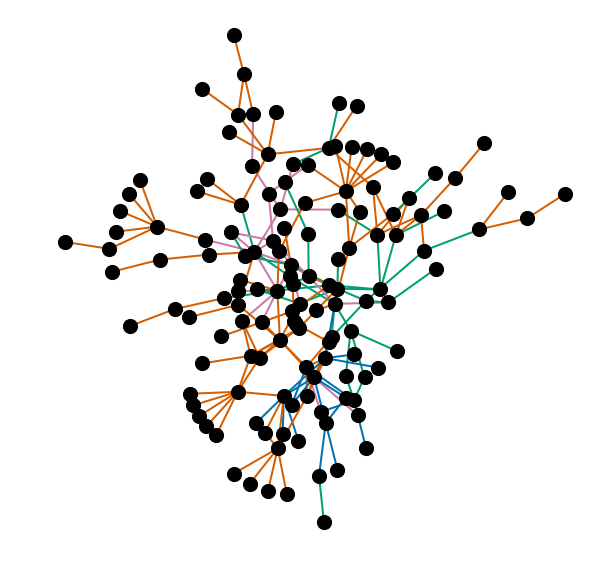

{'NEB': '#0072b2', 'DeepDecarbon': '#009e73', 'Reenergizing': '#d55e00', 'Trottier': '#cc79a7'}


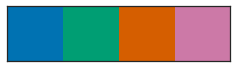

In [117]:
#Testing edge color function
set_style('white')
plt.figure(figsize=(10,10))
plt.axis('off')

layout = nx.kamada_kawai_layout(GSE5)
nx.draw_networkx_nodes(GSE4, layout, node_color='black', node_size=200)
#nx.draw_networkx_labels(GSE, pos=layout, font_size=16)
nx.draw_networkx_edges(GSE4, layout, edge_color=edges_colors,width=2, alpha=1)

plt.show()

# legend: I still don't know how to align the legend text with the color pa
print(edges_color_map)
palplot(edges_palette)

## Girvan Newman method
The code below shows the process of community detection using Girvan-Newman algorithm (Givran and Newman, 2002, in Community structure in social and biological networks). For this study, I performed iteration 11 times to get a more seggegrated communities for analysis purposes.

In [118]:
from networkx.algorithms.community import girvan_newman

In [119]:
gn_comm = girvan_newman(GSE4)

In [120]:
first_iteration_comm = tuple(sorted(c) for c in next(gn_comm))
#dict(enumerate(first_iteration_comm))

In [121]:
def map_communities(G, communities):
    """Return a mapping of community membership from a community set tuple"""
    community_map = {}
    for node in G.nodes():
        for i, comm in enumerate(communities):
            if node in comm:
                community_map[node] = i
        if community_map.get(node, None) is None:
            community_map[node] = None
    return community_map

In [122]:
community_map = map_communities(GSE4, first_iteration_comm)
#print(community_map)
#len(GSE4.node())
nx.set_node_attributes(GSE4, community_map,'community')
node_colors, node_color_map, node_palette = create_ncolor_map(GSE4, 'community')

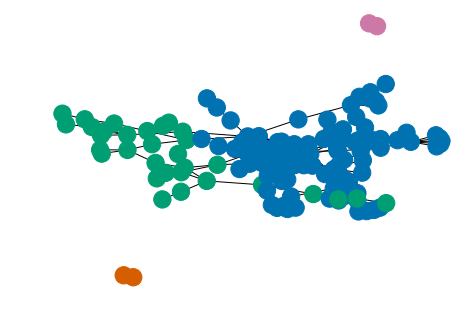

In [123]:
#quick view of graph to see how many communities were detected
nx.draw(GSE4, node_color=node_colors)

In [124]:
iteration_num = 10 #input the number of iteration required for community detections. number to input is total iter - two.
while iteration_num > 0:
    second_comm = tuple(sorted(c) for c in next(gn_comm))
    community_map_2 = map_communities(GSE4, second_comm)
    iteration_num = iteration_num - 1

*Need a little more work on this to tighten up the code. The code now is messy and may be unreadable*
I perform iteration on the community detection to produce a certain number of community groups.

iteration_num = 8 results 12 groups

iteration_num = 9 results 13 groups

iteration_num = 10 results 14-15 groups

In [125]:
# Community three is the final iteration (or iteration number 11th if the iteration_num = 9)

third_comm = tuple(sorted(c) for c in next(gn_comm))
community_map_3 = map_communities(GSE4, third_comm)
nx.set_node_attributes(GSE4, community_map_3,'community three')
#Choose a different color palette called 'cubehelix' from seaborn
node_colors, node_color_map, node_palette = create_ncolor_map(GSE4, 'community three', 'cubehelix')

In [126]:
#dict(enumerate(third_comm))

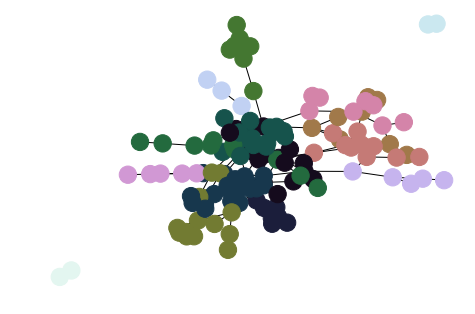

In [127]:
nx.draw(GSE4, node_color=node_colors)

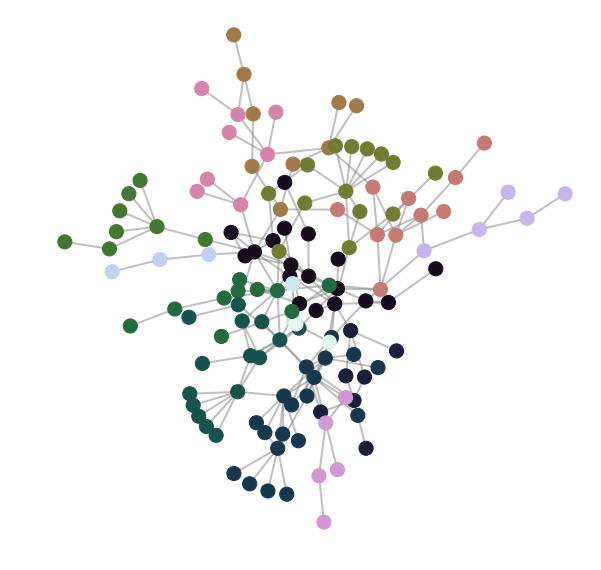


 {0: '#150b1d', 1: '#1b1e3b', 2: '#17374d', 3: '#16534c', 4: '#236a3e', 5: '#447731', 6: '#727b32', 7: '#a1794a', 8: '#c57a76', 9: '#d484a9', 10: '#d198d4', 11: '#c6b4ee', 12: '#c1d1f3', 13: '#cbe8f0', 14: '#e3f6f0'}


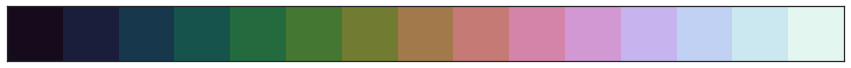

In [128]:
set_style('white')
plt.figure(figsize=(10,10))
plt.axis('off')

#layout = nx.spring_layout(GSE, random_state=28)
layout = nx.kamada_kawai_layout(GSE5)
nx.draw_networkx_nodes(GSE4, layout, node_color=node_colors, node_size=200)
#nx.draw_networkx_labels(GSE4, pos=layout, font_size=10)
nx.draw_networkx_edges(GSE4, layout, edge_color='grey',width=2, alpha=0.5)

plt.show()

# legend
print("\n",node_color_map)
palplot(node_palette)


## Louvain method
Below is the code for detecting community using Louvain method

In [129]:
from community import community_louvain

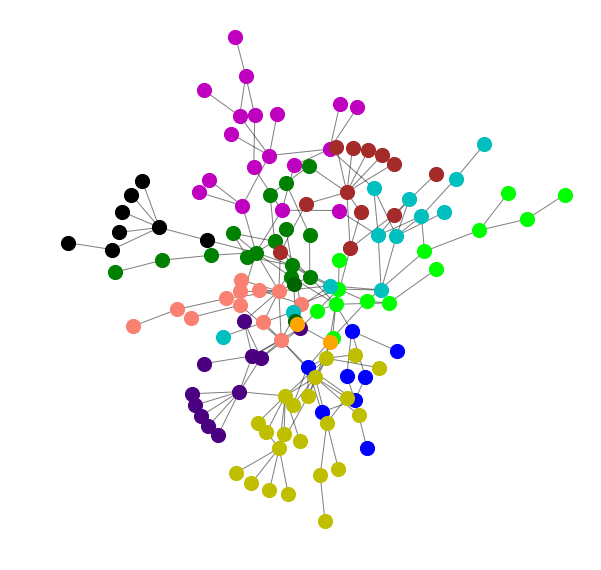

In [130]:
#first compute the best partition
partition = community_louvain.best_partition(GSE4)
mycolor_list = ['r','g','b','y','salmon','indigo','lime','k','m','c','brown','darkgreen','orange']

#drawing
set_style('white')
plt.figure(figsize=(10,10))
plt.axis('off')

size = float(len(set(partition.values())))
pos = nx.kamada_kawai_layout(GSE5)
count = 0.
for com in set(partition.values()) :
    count = count + 1
    mycc = mycolor_list[int(count)]
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    #nx.draw_networkx_nodes(GSE4, pos, list_nodes, node_size = 200, node_color = str(count / size))
    nx.draw_networkx_nodes(GSE4, pos, list_nodes, node_size = 200, node_color = mycc)

nx.draw_networkx_edges(GSE4,pos, alpha=0.5)
plt.show()

## Plot the two methods side by side

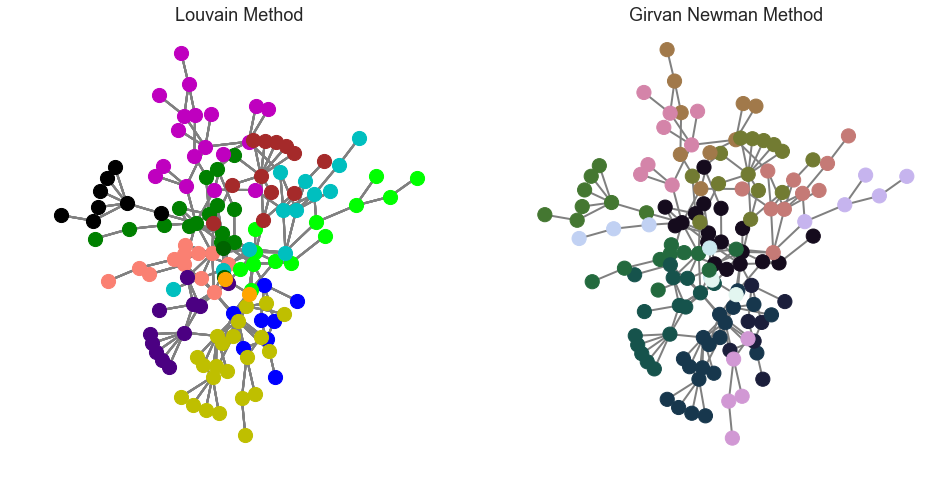

In [131]:
plt.figure(3)
layout = nx.kamada_kawai_layout(GSE5)
set_style('white')
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.axis('off')
plt.title('Louvain Method',fontsize=18)
mycolor_list = ['r','g','b','y','salmon','indigo','lime','k','m','c','brown','darkgreen','orange']

size = float(len(set(partition.values())))
pos = nx.kamada_kawai_layout(GSE5)
count = 0.
for com in set(partition.values()) :
    count = count + 1
    mycc = mycolor_list[int(count)]
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(GSE4, pos, list_nodes, node_size = 200, node_color = mycc)

    nx.draw_networkx_edges(GSE4,pos, edge_color='grey',width=2, alpha=0.5)

plt.subplot(122)
plt.axis('off')
plt.title('Girvan Newman Method',fontsize=18)

layout = nx.kamada_kawai_layout(GSE5)
nx.draw_networkx_nodes(GSE4, layout, node_color=node_colors, node_size=200)
nx.draw_networkx_edges(GSE4, layout, edge_color='grey',width=2, alpha=1)

plt.show()

GN method produces 14 groups. Louvain produces 12 groups.

## Group list
Create a dataframe of descriptors based on groups. The list of group is taken based on community three attribute which means that groups are created after subjecting communities detection 11 times (11 iterations). There are 13 groups identified by the algorithm, however, this grouping is not the same as the output produced by CNM algorithm in NodeXL

In [151]:
gp_list1 = []
gp_list2 = []
gp_list3 = []
countx = 0
for x in third_comm:
    for y in third_comm[countx]:
        gp_list1.append(y)
        gp_list2.append(countx)
        gp_list3.append(partition[y])
    countx = countx +1
dfgp_lst = pd.DataFrame(
    {'descriptor': gp_list1,
     'gngroup_num': gp_list2,
     'lvgroup_num':gp_list3
    })
dfgp_lst.head(20)

,descriptor,gngroup_num,lvgroup_num
0,Adoption of EV,0,0
1,Biofuels consumption,0,0
2,Biofuels production,0,3
3,Electricity consumption,0,0
4,Energy intensity,0,5
5,Energy intensity (transport),0,0
6,Fuel switching,0,0
7,GHG Emissions (aggregate),0,0
8,GHG Emissions (agriculture),0,5
9,GHG Emissions (oil and gas),0,5


In [152]:
dfgp_lst.tail(20)

,descriptor,gngroup_num,lvgroup_num
115,Resilience of indigenous communities,9,7
116,Road infrastructure,9,7
117,Social acceptance,9,7
118,Gas-fired generation,10,2
119,LNG demand,10,2
120,LNG demand (USA),10,2
121,LNG demand (USA/Canada),10,2
122,LNG prices (global),10,2
123,Carbon sink,11,5
124,District cooling/heating,11,5
